# Analyze Nobel Prize winner data and identify patterns by answering the following questions:

### 1. What is the most commonly awarded gender and birth country? Storing the string answers as top_gender and top_country.
### 2. What decade had the highest proportion of US-born winners? Store this as an integer called max_decade_usa.
### 3.What decade and category pair had the highest proportion of female laureates? Store this as a dictionary called max_female_dict where the decade is the key and the category is the value.
### 4. Who was the first woman to receive a Nobel Prize, and in what category? Save your string answers as first_woman_name and first_woman_category.
### 5. Which individuals or organizations have won multiple Nobel Prizes throughout the years? Store the full names in a list named repeat_list.


In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from math import *


In [133]:
df = pd.read_csv(r"C:\Users\Shubh\OneDrive - The University of Texas at Dallas\Uni of Tex at Dallas\coursera\nobel.csv")
print('Imported!')

Imported!


In [134]:
#Inspecting Data
print(df.columns)
print(df.head(10))
print(df.info())
print(df.describe)
print(df.isna().sum(axis=0)) #nulls and duplicates are fine given the nature of dataset


Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')
   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   
5  1901     Physics                 The Nobel Prize in Physics 1901   
6  1902   Chemistry               The Nobel Prize in Chemistry 1902   
7  1902  Literature              The Nobel Prize in Literature 1902   
8  1902    Medicine  The Nobel Prize in Phys

### 1. What is the most commonly awarded gender and birth country? Storing the string answers as top_gender and top_country.


In [135]:
gender_dist = df['sex'].value_counts().reset_index().rename(columns={'count':'total'})
#print(gender_dist)
top_gender=gender_dist[gender_dist['sex']=='Male'].reset_index(drop=True)
#print(top_gender)
print(f"The most commonly awarded gender is {top_gender['sex'][0]} with total awards = {top_gender['total'][0]}")

country_dist = df['birth_country'].value_counts().reset_index()
top_country = country_dist[country_dist['birth_country']=='United States of America']
print(f"The most commonly awarded country is {top_country['birth_country'][0]} with total awards = {top_country['count'][0]}")

The most commonly awarded gender is Male with total awards = 905
The most commonly awarded country is United States of America with total awards = 291


### 2. What decade had the highest proportion of US-born winners? Store this as an integer called max_decade_usa.

In [166]:
#df.groupby('year')['prize'].count().sort_values(ascending=False)
df['decade'] = pd.cut(df['year'], bins=range(1900, 2040, 10), right=False, labels=range(1900, 2030, 10))
usa_df = df[df['birth_country']=='United States of America']

highest_decade = usa_df.groupby('decade')['prize'].count().sort_values(ascending=False).reset_index()
#print(highest_decade)
filtered_max = highest_decade[highest_decade['decade']==2000]
#print(filtered_max)
max_decade_usa = filtered_max
#print(max_decade_usa)
print(f"Decade {max_decade_usa['decade'][0]} had the highest population of US-born winners.")

Decade 2000 had the highest population of US-born winners.


C:\Users\Shubh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


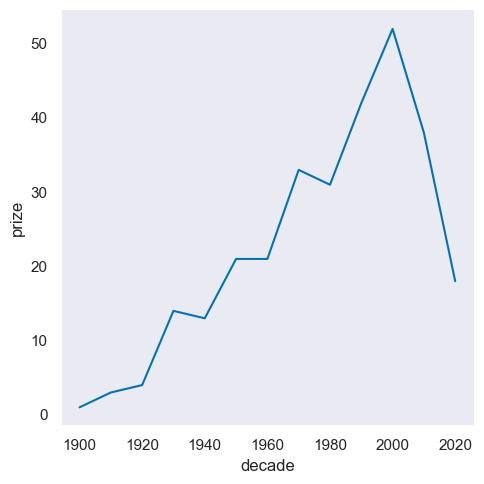

In [282]:
sns.set_palette("colorblind")
sns.set_context('notebook')
sns.relplot(x='decade', y='prize',data = highest_decade, kind='line',markers=True,errorbar=('ci',True))
plt.show()


### 3.What decade and category pair had the highest proportion of female laureates? Store this as a dictionary called max_female_dict where the decade is the key and the category is the value

In [173]:
print(df['category'].unique())

['Chemistry' 'Literature' 'Medicine' 'Peace' 'Physics' 'Economics']


In [200]:
df['women'] = df['sex'] == 'Female'
womendata= df.groupby(['decade','category'],as_index=False)['women'].mean()
max_female_decade_category = womendata[womendata['women']==womendata['women'].max()][['decade','category']]
print(max_female_decade_category)

   decade    category
74   2020  Literature


C:\Users\Shubh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


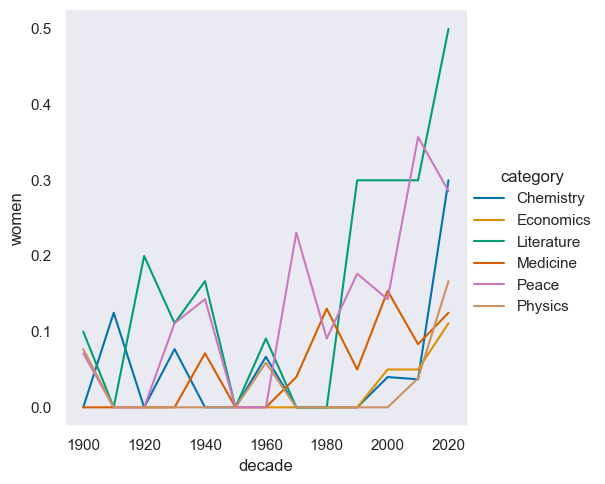

<Figure size 1200x600 with 0 Axes>

In [289]:
sns.set_palette('colorblind')
sns.set_context('notebook')
sns.relplot(x='decade', y='women', data=womendata, kind='line',hue='category',markers=True, errorbar=None)
plt.figure(figsize=(12, 6))
plt.show()

### 4. Who was the first woman to receive a Nobel Prize, and in what category? Save your string answers as first_woman_name and first_woman_category.

In [201]:
print(df.columns)

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country',
       'decade', 'female_winner', 'women'],
      dtype='object')


In [224]:
details = df[df['sex']=='Female']
#print(details.columns)
filtered_details = details[['year','full_name','prize','category']].sort_values(by='year',ascending=True).reset_index()
#print(filtered_details)
first_woman_name = filtered_details['full_name'][0]
#print(first_woman_name)
first_woman_category = filtered_details['category'][0]
#print(first_woman_category)
print(f"The first woman to receive a Nobel Prize is '{first_woman_name}' in the category of '{first_woman_category}'.")
 

The first woman to receive a Nobel Prize is 'Marie Curie, née Sklodowska' in the category of 'Physics'.


### 5. Which individuals or organizations have won multiple Nobel Prizes throughout the years? Store the full names in a list named repeat_list.

In [244]:
# Won mutiple awards is defined as winning 2 or more Nobel Prizes
print(df.columns)

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country',
       'decade', 'female_winner', 'women'],
      dtype='object')


In [245]:
#print(df[['full_name','laureate_id','laureate_type']])
dataset = df.groupby(['laureate_id','full_name'])['prize'].count().sort_values(ascending=False).reset_index()
filtered_dataset = dataset[dataset['prize']>=2].set_index('full_name')
#print(filtered_dataset)
repeat_list = []
for row,col in filtered_dataset.iterrows():
    repeat_list.append(row)
    
print(f"Individuals or organizations that have won multiple Nobel Prizes throughout the years are: \n {repeat_list}")

Individuals or organizations that have won multiple Nobel Prizes throughout the years are: 
 ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Linus Carl Pauling']
